# **What is data preprocessing?**

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format.


**Load the library to run the functions**





In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from numpy import array 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
dataset = pd.DataFrame()

X = pd.DataFrame()
y = pd.DataFrame()
dataset_minmax_pca = pd.DataFrame()
dataset_minmax = pd.DataFrame()
dataset_minmax_corr = pd.DataFrame()

**Load the dataset**

In [17]:
def loaddata(file):
    dataset =  pd.read_csv(file)
    dataset.head(5)
    dataset = pd.DataFrame(dataset).fillna(0)
#     dataset = pd.get_dummies(dataset,columns= ['attack_cat'])
    X=dataset.drop(columns=['label'], axis = 1)
    y=dataset['label']
    return dataset,X,y

## 1.**Correlation analysis**




*   Correlation can help in predicting one attribute from another (Great way to impute missing values).
*   List itemCorrelation can (sometimes) indicate the presence of a causal relationship.




**X (train) , y(label)**

**Remove the highly correlated features : to each other**

Advantage: Reduces noise 

[Reference](https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/)

### 1.1**Function to remove highly correlated data**

In [18]:
def removeHcorrFeature(percentage,X):
  # Selecting all the features with high correlation values with other features
    corr_matrix = X.corr().abs()

  # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find index of feature columns with correlation greater than 0.9
    o_drop = [column for column in upper.columns if any(upper[column] > percentage)]
    print(o_drop)
    return o_drop

# 2.**Feature elimination**


RFE is an efficient approach for eliminating features from a training dataset for feature selection.

### 2.1**SelectKbest**

**Function for SelectKbest**

In [19]:
def applySelectKBest(K,X,y):
    select = SelectKBest(score_func=f_regression, k=K)
    print(X)
    z = select.fit_transform(X, y) 
    print("After selecting best  features:", z)  
    filter = select.get_support()
    features = X.columns
    print("All features:")
    data_set.name =  features
    print(features[filter])
    return features[filter]

### 2.2**Recursive Elimination**

**Function for feature Elimination**



In [20]:
def RFE(X,y):

  # Build a classification task using 3 informative features

# Create the RFE object and compute a cross-validated score.
    svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

    min_features_to_select = 25 
    rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
    rfecv.fit(X, y)

    print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (accuracy)")
    print(plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
     ))
    print(plt.show())

# 3.**Feature Scaling**

### 3.1 **MinMaxScaling**

About MinMax Scaler : 
* This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian.     
* This Scaler is sensitive to outliers.

**Function for min max scaling**

In [21]:
def applyMinMax(data):  
# scale features
    scaler = MinMaxScaler()
    model=scaler.fit(data)
    scaled_data=model.transform(data)
    return scaled_data
  #print(data_set)
  

### 3.2 **Standard Scaling**

About Standard Scaler: 
* Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. 
* This scaler responds well when a distribution is Gaussian.

**Function for standard scaler**

In [22]:
def applyStandardScaler(data):
    scaler = StandardScaler()
    model = scaler.fit(data)
    scaled_data = model.transform(data)
  #print(data_set)
    return scaled_data

## TODO- Check for Gaussian Distribution of data

In [28]:
def plotDataSetDistribution(dataset):
#     length = len(dataset.columns)
#     for i in range(0,length):
#         my_data = pd.Series(dataset.iloc[:,i-1])
#         my_data.hist()
        
# my_data.plot(kind = 'box')
 


## TODO - Conclusion -which scaler to use?

# 4.**Principle component Analysis**

### 4.1**Functions for applying PCA method**

In [24]:
def applyPCA(X, n_com):
   #print(data_set)
    pca = PCA(n_components=n_com).fit(X)
    X_train_pca = pca.transform(X)
    print(pca.n_components_)
    return X_train_pca

# Main function 

Points to note:

1) Scaling is critical while performing Principal Component Analysis(PCA). PCA tries to get the features with maximum variance, and the variance is high for high magnitude features and skews the PCA towards high magnitude features. [Reference](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)     

In [29]:
def main(filename):
    dataset,X,y=loaddata(filename)
    
    cols = X.columns
    n_com =0.99
    
    #check if the dataset is gaussian
    plotDataSetDistribution(dataset)
    
    #Add min max scaler and return the dataset in pandas dataframe :
    print("Apply MinMax scaler")
    X = applyMinMax(X)
    X = pd.DataFrame(X, columns =cols)
    dataset_minmax = pd.concat([X, y], axis=1)
    
    #Standard scaling and PCA
    print("Apply PCA")
    print("Apply Standard scaler")
    print(np.where(np.isnan(X)))
    X1 = applyStandardScaler(X)
    X1 = pd.DataFrame(X1, columns = cols)
    X1 = applyPCA(X1, n_com)
    print(X1)
    dataset_ss_pca = pd.DataFrame(X1)
    dataset_ss_pca = pd.concat([dataset_ss_pca, y], axis=1)
  
    #Min_max and correlation analysis :
    print("Remove highly correlated features with each other")
    X2= dataset_minmax.drop(columns='label')
    col = removeHcorrFeature(n_com, X2)
    print(col)
    X.drop(X[col], axis=1, inplace=True)
    X = pd.DataFrame(X, columns =cols)
    dataset_minmax_corr = pd.concat([X, y], axis=1)
    
    return dataset_minmax,dataset_ss_pca, dataset_minmax_corr

Apply MinMax scaler
Apply PCA
Apply Standard scaler
(array([], dtype=int64), array([], dtype=int64))
30
[[-7.58855110e-01 -1.80928964e+00  1.33183023e+00 ...  3.81187041e-01
   4.08892671e-02 -4.54154402e-03]
 [-1.01355506e+00 -2.18207309e+00  1.50577168e+00 ...  5.42351424e-01
  -8.70239836e-02 -4.00515542e-01]
 [-1.26272563e+00 -2.13471947e+00  1.52134298e+00 ...  3.91254134e-01
  -1.52370660e-02 -3.18988700e-01]
 ...
 [-1.71323020e+00 -9.27200772e-01  6.75256974e-01 ...  2.81742016e-01
   1.01743021e-01  2.21095505e-01]
 [-5.81140121e+00  2.35214811e+00 -1.74594195e+00 ... -2.07445730e-01
  -4.37438591e-02  5.05000780e-01]
 [-5.89694012e+00  2.41285465e+00 -1.79495293e+00 ... -1.13556711e-01
  -4.46730943e-02  2.60821043e-01]]
Remove highly correlated features with each other


<ipython-input-18-afe22951a4b7>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['sloss', 'dloss']
['sloss', 'dloss']


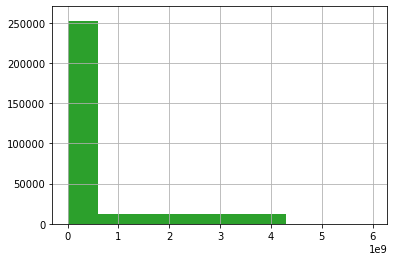

In [30]:
dataset_minmax_onehot,dataset_ss_pca_onehot,dataset_minmax_corr_onehot=main("./input/cleaned_dataset_label_encoding.csv")

In [24]:
dataset_minmax_labelenc,dataset_ss_pca_labelenc,dataset_minmax_corr_labelenc=main("./input/cleaned_dataset_label_encoding.csv")

Apply MinMax scaler
Apply PCA
Apply Standard scaler
(array([], dtype=int64), array([], dtype=int64))
37
[[-0.41906513 -2.11992704  1.11814888 ...  0.02956914  0.04351234
  -0.60310596]
 [-0.63754233 -2.60542159  1.07733467 ... -0.06976788 -0.15886888
  -0.16489642]
 [-0.88077966 -2.5661088   1.14601349 ... -0.18671578 -0.08530525
  -0.24726171]
 ...
 [-2.19801461 -0.80680726  0.25039407 ...  0.05436507  0.05098888
   0.12647326]
 [-6.234215    2.59802966 -1.04536122 ... -0.03545662 -0.0434305
  -0.15128876]
 [-6.31930509  2.66232284 -1.07527111 ... -0.03044696 -0.053424
  -0.0968778 ]]
Remove highly correlated features with each other


<ipython-input-16-afe22951a4b7>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['sloss', 'dloss']
['sloss', 'dloss']


# 6.**Save the preprocessed file**

In [28]:
dataset_minmax_onehot.to_csv('data_minmax_onehot.csv', index=False)
dataset_ss_pca_onehot.to_csv('dataset_ss_pca_onehot.csv', index=False)
dataset_minmax_corr_onehot.to_csv('dataset_minmax_corr_onehot.csv', index=False)

In [29]:
dataset_minmax_labelenc.to_csv('data_minmax_labelenc.csv', index=False)
dataset_ss_pca_labelenc.to_csv('dataset_ss_pca_labelenc.csv', index=False)
dataset_minmax_corr_labelenc.to_csv('dataset_minmax_corr_labelenc.csv', index=False)

In [31]:
dataset_minmax_onehot

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms,label
0,1.833334e-07,0.000094,0.000000,0.000033,0.000000,0.090909,0.996078,0.000000,0.030121,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,1.333334e-07,0.000094,0.000000,0.000121,0.000000,0.125000,0.996078,0.000000,0.147128,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,8.333335e-08,0.000094,0.000000,0.000073,0.000000,0.200000,0.996078,0.000000,0.142685,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,1.000000e-07,0.000094,0.000000,0.000061,0.000000,0.166667,0.996078,0.000000,0.100200,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,1.666667e-07,0.000094,0.000000,0.000146,0.000000,0.100000,0.996078,0.000000,0.142017,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,1.500000e-07,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,0.000000,0.008461,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
257669,8.429368e-03,0.000845,0.000726,0.000042,0.000024,0.000034,0.996078,0.992126,0.000001,0.000219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
257670,1.500000e-07,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,0.000000,0.008461,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
257671,1.500000e-07,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,0.000000,0.008461,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [30]:
dataset_ss_pca_onehot

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms,label
0,1.833334e-07,0.000094,0.000000,0.000033,0.000000,0.090909,0.996078,0.000000,0.030121,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,1.333334e-07,0.000094,0.000000,0.000121,0.000000,0.125000,0.996078,0.000000,0.147128,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,8.333335e-08,0.000094,0.000000,0.000073,0.000000,0.200000,0.996078,0.000000,0.142685,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,1.000000e-07,0.000094,0.000000,0.000061,0.000000,0.166667,0.996078,0.000000,0.100200,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,1.666667e-07,0.000094,0.000000,0.000146,0.000000,0.100000,0.996078,0.000000,0.142017,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,1.500000e-07,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,0.000000,0.008461,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
257669,8.429368e-03,0.000845,0.000726,0.000042,0.000024,0.000034,0.996078,0.992126,0.000001,0.000219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
257670,1.500000e-07,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,0.000000,0.008461,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
257671,1.500000e-07,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,0.000000,0.008461,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [32]:
dataset_minmax_corr_onehot

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms,label
0,1.833334e-07,0.000094,0.000000,0.000033,0.000000,0.090909,0.996078,0.000000,0.030121,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,1.333334e-07,0.000094,0.000000,0.000121,0.000000,0.125000,0.996078,0.000000,0.147128,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,8.333335e-08,0.000094,0.000000,0.000073,0.000000,0.200000,0.996078,0.000000,0.142685,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,1.000000e-07,0.000094,0.000000,0.000061,0.000000,0.166667,0.996078,0.000000,0.100200,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,1.666667e-07,0.000094,0.000000,0.000146,0.000000,0.100000,0.996078,0.000000,0.142017,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,1.500000e-07,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,0.000000,0.008461,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
257669,8.429368e-03,0.000845,0.000726,0.000042,0.000024,0.000034,0.996078,0.992126,0.000001,0.000219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
257670,1.500000e-07,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,0.000000,0.008461,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
257671,1.500000e-07,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,0.000000,0.008461,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [33]:
dataset_minmax_labelenc

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,attack_cat_1,attack_cat_2,attack_cat_3,attack_cat_4,attack_cat_5,attack_cat_6,attack_cat_7,attack_cat_8,attack_cat_9,label
0,1.833334e-07,0.901515,0.000000,0.5,0.000094,0.000000,0.000033,0.000000,0.090909,0.996078,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,1.333334e-07,0.901515,0.000000,0.5,0.000094,0.000000,0.000121,0.000000,0.125000,0.996078,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,8.333335e-08,0.901515,0.000000,0.5,0.000094,0.000000,0.000073,0.000000,0.200000,0.996078,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,1.000000e-07,0.901515,0.000000,0.5,0.000094,0.000000,0.000061,0.000000,0.166667,0.996078,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,1.666667e-07,0.901515,0.000000,0.5,0.000094,0.000000,0.000146,0.000000,0.100000,0.996078,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,1.500000e-07,0.901515,0.166667,0.5,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
257669,8.429368e-03,0.856061,0.000000,0.4,0.000845,0.000726,0.000042,0.000024,0.000034,0.996078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
257670,1.500000e-07,0.901515,0.166667,0.5,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
257671,1.500000e-07,0.901515,0.166667,0.5,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [34]:
dataset_ss_pca_labelenc

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,label
0,-0.419065,-2.119927,1.118149,0.305706,0.030100,-0.937445,-0.238218,0.461844,-0.517538,0.391432,...,0.536273,-0.216967,0.395704,-0.109515,0.275175,0.122212,0.029569,0.043512,-0.603106,0
1,-0.637542,-2.605422,1.077335,1.305336,0.045355,-1.832052,-0.359036,0.794033,-0.366003,4.087084,...,0.209959,-0.135154,0.955325,-0.109671,1.367176,0.363866,-0.069768,-0.158869,-0.164896,0
2,-0.880780,-2.566109,1.146013,1.020479,0.231062,-1.703287,-0.278822,0.804521,-0.492220,3.220713,...,0.088809,-0.053218,0.621069,-0.148653,1.405911,0.533148,-0.186716,-0.085305,-0.247262,0
3,-0.821070,-2.303527,1.093807,0.748833,0.128514,-1.390220,-0.270840,0.663318,-0.497009,2.234905,...,0.335753,-0.144657,0.544480,-0.148749,0.921206,0.351896,-0.096421,-0.047803,-0.400572,0
4,-0.694834,-2.444316,0.975754,1.392980,-0.091991,-1.810689,-0.412581,0.752901,-0.313447,4.457212,...,0.273092,-0.173868,1.052151,-0.103829,1.140177,0.196217,0.012695,-0.190318,-0.179961,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,-5.255191,1.777675,-0.736907,-0.371346,-0.243335,0.510552,0.033847,-0.250381,0.115757,-0.370820,...,0.653774,-0.258297,0.344374,0.015634,0.359948,0.179104,-0.005985,-0.048224,-0.030001,1
257669,2.960503,-0.328863,-1.700490,0.261982,0.672909,-0.633525,-0.608692,-0.310329,-1.214939,-1.026442,...,-0.385623,0.094397,-0.134424,0.340354,0.009046,0.209259,0.490189,-0.372663,-0.106055,1
257670,-2.198015,-0.806807,0.250394,0.303528,0.236990,-0.551117,0.129768,0.140668,0.217699,-0.565213,...,-0.616450,0.184983,0.272479,0.179930,0.383046,0.053434,0.054365,0.050989,0.126473,1
257671,-6.234215,2.598030,-1.045361,-0.589604,-0.395565,0.835514,-0.018382,-0.362538,0.040896,-0.269760,...,0.710133,-0.253902,0.189932,-0.002920,0.247271,0.207200,-0.035457,-0.043431,-0.151289,1


In [35]:
dataset_minmax_corr_labelenc

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,attack_cat_1,attack_cat_2,attack_cat_3,attack_cat_4,attack_cat_5,attack_cat_6,attack_cat_7,attack_cat_8,attack_cat_9,label
0,1.833334e-07,0.901515,0.000000,0.5,0.000094,0.000000,0.000033,0.000000,0.090909,0.996078,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,1.333334e-07,0.901515,0.000000,0.5,0.000094,0.000000,0.000121,0.000000,0.125000,0.996078,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,8.333335e-08,0.901515,0.000000,0.5,0.000094,0.000000,0.000073,0.000000,0.200000,0.996078,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,1.000000e-07,0.901515,0.000000,0.5,0.000094,0.000000,0.000061,0.000000,0.166667,0.996078,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,1.666667e-07,0.901515,0.000000,0.5,0.000094,0.000000,0.000146,0.000000,0.100000,0.996078,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,1.500000e-07,0.901515,0.166667,0.5,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
257669,8.429368e-03,0.856061,0.000000,0.4,0.000845,0.000726,0.000042,0.000024,0.000034,0.996078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
257670,1.500000e-07,0.901515,0.166667,0.5,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
257671,1.500000e-07,0.901515,0.166667,0.5,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
